In [108]:
import yfinance as yf
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

In [109]:
df = yf.download('INFY.NS', start = '2018-01-01', end = '2018-12-31')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,518.849976,522.250000,515.000000,516.775024,460.407745,5431340
2018-01-02,518.625000,521.000000,511.500000,514.849976,458.692657,6112248
2018-01-03,514.250000,515.799988,509.299988,510.649994,454.950836,6846552
2018-01-04,510.500000,510.500000,504.799988,507.700012,452.322693,8947614
2018-01-05,507.649994,513.200012,503.000000,506.000000,450.808014,11025976
...,...,...,...,...,...,...
2018-12-21,659.500000,659.500000,643.450012,646.200012,586.586548,12802132
2018-12-24,657.000000,658.799988,647.599976,649.000000,589.128235,8379825
2018-12-26,647.000000,647.000000,637.349976,644.049988,584.634949,6178552


In [110]:
#defining the 5 lines of calcullation 

#conversion line
df['CL'] = (df.High.rolling(window = 9).mean() + df.Low.rolling(window = 9).mean())/2


#Base Line 
df['BL'] = (df.High.rolling(window = 26).mean() + df.Low.rolling(window = 26).mean())/2

#Leading Span A 
df['LS_A'] = (df['CL'] + df['BL'])/2

#Leading Span B 
df['LS_B'] = (df.High.rolling(window = 52).mean() + df.Low.rolling(window = 52).mean())/2

#lagging Span 
df['LS'] = df.Close.rolling(window = 26).mean()
            
df

,Open,High,Low,Close,Adj Close,Volume,CL,BL,LS_A,LS_B,LS
Date,,,,,,,,,,,
2018-01-01,518.849976,522.250000,515.000000,516.775024,460.407745,5431340,NaN,NaN,NaN,NaN,NaN
2018-01-02,518.625000,521.000000,511.500000,514.849976,458.692657,6112248,NaN,NaN,NaN,NaN,NaN
2018-01-03,514.250000,515.799988,509.299988,510.649994,454.950836,6846552,NaN,NaN,NaN,NaN,NaN
2018-01-04,510.500000,510.500000,504.799988,507.700012,452.322693,8947614,NaN,NaN,NaN,NaN,NaN
2018-01-05,507.649994,513.200012,503.000000,506.000000,450.808014,11025976,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,659.500000,659.500000,643.450012,646.200012,586.586548,12802132,678.391666,663.756730,671.074198,669.247597,663.801924
2018-12-24,657.000000,658.799988,647.599976,649.000000,589.128235,8379825,676.386108,663.635576,670.010842,667.982692,663.517308
2018-12-26,647.000000,647.000000,637.349976,644.049988,584.634949,6178552,672.669440,663.205767,667.937604,666.629807,663.255770


In [111]:
#dropping and adjusting values 

df = df.dropna()

df

,Open,High,Low,Close,Adj Close,Volume,CL,BL,LS_A,LS_B,LS
Date,,,,,,,,,,,
2018-03-16,591.000000,591.200012,584.625000,585.950012,522.037598,17954826,584.747226,573.518755,579.132991,563.082936,573.582696
2018-03-19,582.000000,590.250000,571.325012,573.375000,510.834076,7526620,585.140283,574.430293,579.785288,564.278369,574.307695
2018-03-20,574.299988,585.000000,574.299988,582.275024,518.763367,8553766,585.711114,574.965388,580.338251,565.497599,574.890388
2018-03-21,585.000000,587.750000,581.099976,583.750000,520.077393,7692994,586.347222,576.036541,581.191882,566.879811,576.012503
2018-03-22,582.250000,588.724976,577.650024,580.650024,517.315613,6813168,586.658332,577.136060,581.897196,568.332455,577.137503
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,659.500000,659.500000,643.450012,646.200012,586.586548,12802132,678.391666,663.756730,671.074198,669.247597,663.801924
2018-12-24,657.000000,658.799988,647.599976,649.000000,589.128235,8379825,676.386108,663.635576,670.010842,667.982692,663.517308
2018-12-26,647.000000,647.000000,637.349976,644.049988,584.634949,6178552,672.669440,663.205767,667.937604,666.629807,663.255770


In [112]:
#setting the last 26 day values to none for lagging span 
df['LS'][-52:] = None
df['Close'][-26:] = None
df['CL'][-26:] = None
df['BL'][-26:] = None
df['LS_A'][-26:] = None

df

/var/folders/8p/q640lyvd4lg6hp54l3d4dq0h0000gn/T/ipykernel_7984/132683488.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LS'][-52:] = None
/var/folders/8p/q640lyvd4lg6hp54l3d4dq0h0000gn/T/ipykernel_7984/132683488.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close'][-26:] = None
/var/folders/8p/q640lyvd4lg6hp54l3d4dq0h0000gn/T/ipykernel_7984/132683488.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CL'][-26:]

,Open,High,Low,Close,Adj Close,Volume,CL,BL,LS_A,LS_B,LS
Date,,,,,,,,,,,
2018-03-16,591.000000,591.200012,584.625000,585.950012,522.037598,17954826,584.747226,573.518755,579.132991,563.082936,573.582696
2018-03-19,582.000000,590.250000,571.325012,573.375000,510.834076,7526620,585.140283,574.430293,579.785288,564.278369,574.307695
2018-03-20,574.299988,585.000000,574.299988,582.275024,518.763367,8553766,585.711114,574.965388,580.338251,565.497599,574.890388
2018-03-21,585.000000,587.750000,581.099976,583.750000,520.077393,7692994,586.347222,576.036541,581.191882,566.879811,576.012503
2018-03-22,582.250000,588.724976,577.650024,580.650024,517.315613,6813168,586.658332,577.136060,581.897196,568.332455,577.137503
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,659.500000,659.500000,643.450012,NaN,586.586548,12802132,NaN,NaN,NaN,669.247597,NaN
2018-12-24,657.000000,658.799988,647.599976,NaN,589.128235,8379825,NaN,NaN,NaN,667.982692,NaN
2018-12-26,647.000000,647.000000,637.349976,NaN,584.634949,6178552,NaN,NaN,NaN,666.629807,NaN


In [113]:
df['buy_signal'] = np.where((df.LS > df.Close) & (df.LS_A > df.LS_B), True, False)
df['sell_signal'] = np.where((df.LS < df.Close) & (df.LS_A < df.LS_B), True, False)
df

/var/folders/8p/q640lyvd4lg6hp54l3d4dq0h0000gn/T/ipykernel_7984/3221649219.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['buy_signal'] = np.where((df.LS > df.Close) & (df.LS_A > df.LS_B), True, False)
/var/folders/8p/q640lyvd4lg6hp54l3d4dq0h0000gn/T/ipykernel_7984/3221649219.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sell_signal'] = np.where((df.LS < df.Close) & (df.LS_A < df.LS_B), True, False)


,Open,High,Low,Close,Adj Close,Volume,CL,BL,LS_A,LS_B,LS,buy_signal,sell_signal
Date,,,,,,,,,,,,,
2018-03-16,591.000000,591.200012,584.625000,585.950012,522.037598,17954826,584.747226,573.518755,579.132991,563.082936,573.582696,False,False
2018-03-19,582.000000,590.250000,571.325012,573.375000,510.834076,7526620,585.140283,574.430293,579.785288,564.278369,574.307695,True,False
2018-03-20,574.299988,585.000000,574.299988,582.275024,518.763367,8553766,585.711114,574.965388,580.338251,565.497599,574.890388,False,False
2018-03-21,585.000000,587.750000,581.099976,583.750000,520.077393,7692994,586.347222,576.036541,581.191882,566.879811,576.012503,False,False
2018-03-22,582.250000,588.724976,577.650024,580.650024,517.315613,6813168,586.658332,577.136060,581.897196,568.332455,577.137503,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,659.500000,659.500000,643.450012,NaN,586.586548,12802132,NaN,NaN,NaN,669.247597,NaN,False,False
2018-12-24,657.000000,658.799988,647.599976,NaN,589.128235,8379825,NaN,NaN,NaN,667.982692,NaN,False,False
2018-12-26,647.000000,647.000000,637.349976,NaN,584.634949,6178552,NaN,NaN,NaN,666.629807,NaN,False,False


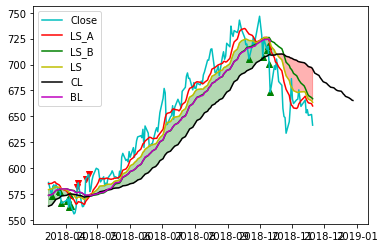

<Figure size 864x432 with 0 Axes>

In [121]:
#plotting the lines 
plt.plot(df['Close'], color ='c')
plt.plot(df['CL'], color ='r')
plt.plot(df['BL'], color ='g')
plt.plot(df['LS_A'], color ='y')
plt.plot(df['LS_B'], color ='k')
plt.plot(df['LS'], color ='m')
plt.legend(['Close','LS_A','LS_B','LS', 'CL', 'BL'])

# fill the cloud 

plt.fill_between(df.index, df.LS_A, df.LS_B, where = (df.LS_A > df.LS_B),  color = 'green', alpha = 0.3)
plt.fill_between(df.index, df.LS_A, df.LS_B, where = (df.LS_A < df.LS_B),  color = 'red', alpha = 0.3)


plt.scatter(df.index[df.buy_signal], df[df.buy_signal].Close, marker = '^', color = 'green')
plt.scatter(df.index[df.sell_signal], df[df.sell_signal].Close, marker = 'v', color = 'red')

plt.figure(figsize = (12,6))
plt.show()

# locating the intersction of leading spans 
#plt.fill_between(df.index, df.LS_A, df.LS_B, color = 'grey', alpha = 0.3)